<a href="https://colab.research.google.com/github/HumayDS/Big-data-analysis/blob/main/Lesson_13_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/Churn_Modelling.csv')

In [3]:
# Get unique count for each variable
df.nunique()

Unnamed: 0         10000
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
Customer_id = df['CustomerId']

In [5]:
df = df.drop(['Unnamed: 0' , 'RowNumber' , 'CustomerId','Surname'] , axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Gender           9999 non-null   object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             1
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
##Dataya NA elave edirem(Oyrenmek meqsedile elave edilir)
df.iloc[4,4] = np.NaN

In [ ]:
#report.to_file('report.html')

In [10]:
#Checking na's and its percentages
# as df.isnull().sum()
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Geography,1,0.0001
Gender,1,0.0001
Tenure,1,0.0001
CreditScore,0,0.0000
Age,0,0.0000
Balance,0,0.0000
NumOfProducts,0,0.0000
HasCrCard,0,0.0000
IsActiveMember,0,0.0000
EstimatedSalary,0,0.0000


In [11]:
##Kategorik deyiskenin ortalamasini mode(en cox tekrarlanan ile doldururam)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [12]:
 	##Kategorik deyiskenin ortalamasini mode(en cox tekrarlanan ile doldururam)
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

In [13]:
##df.dropna()
##NUmeric deyiskeni median ile doldururam
df = df.fillna(df.median())


<ipython-input-13-64f532d454e0>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [14]:
##Nullari tekrar yoxlayiriq
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
##Hazirlanan dataseti yadda saxlayib yuklemek ucun emr
df.to_csv('df.clear.csv')

In [16]:
##Dataya baxish
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.013100,2.892017,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Text(0.5, 1.0, 'boxplot')

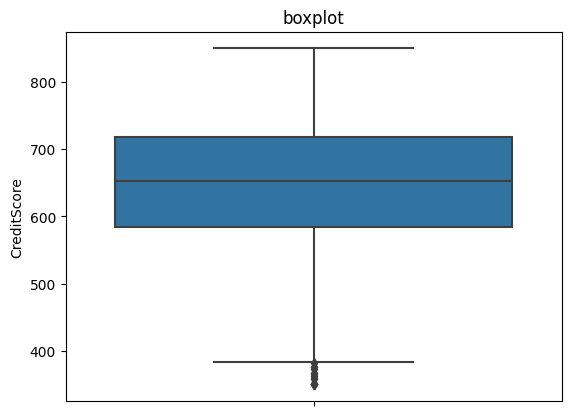

In [17]:
##Outlierleri boxplotla nezerden kecirirem
##Asagi serhedli outlierler gorunur
import seaborn as sns
sns.boxplot(y='CreditScore',data=df).set_title("boxplot")



In [18]:
##1ci quartile
Q1 = np.percentile(df['CreditScore'], 25, method='midpoint')
Q1

584.0

In [19]:
##3-ci quartile
Q3 = np.percentile(df['CreditScore'], 75, method='midpoint')
Q3

718.0

In [20]:
##IQR Interquantile Range
IQR = Q3 - Q1

In [21]:
## Low  Bound  = Q1 - 1.5*IQR
## Upper Bound = Q3 + 1.5*IQR
low_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(low_bound)
print(upper_bound)

383.0
919.0


In [22]:
##Outlierleri datasetden cixariram
df = df[df.CreditScore > low_bound]

In [23]:
df.shape

(9984, 11)

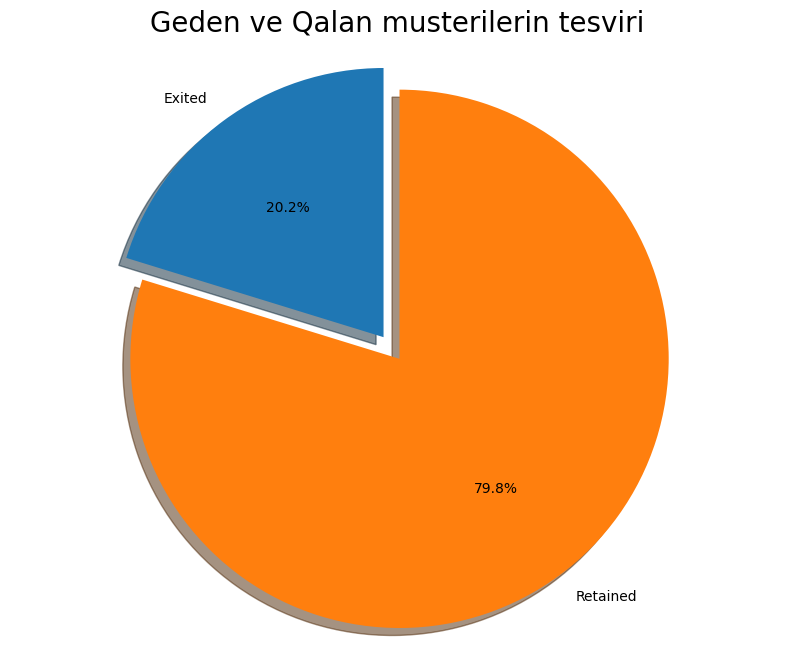

In [24]:
##Pie chart goruntusu (Hazir kod)
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Geden ve Qalan musterilerin tesviri", size = 20)
plt.show()

In [ ]:
## Geography ve Exitede gore pivot table yaradiram
df.groupby('Geography')['Exited'].agg(['count', 'sum'])

,count,sum
Geography,,
France,5008,804
Germany,2505,810
Spain,2471,407


In [25]:
##Pivot table seliqeye salinir(Sutun basliqlari) ve faiz dereceleri cixarilir
g = df.groupby('Geography')['Exited'].agg(['count', 'sum'])
g.index.name = None
g['Perc'] = g['sum']/g['count']
g

,count,sum,Perc
France,5008,804,0.160543
Germany,2505,810,0.323353
Spain,2471,407,0.164711


In [26]:
##Gendere gore exitedin deyiskenlik gosterib gostermediyine baxiram
ge = df.groupby('Gender')['Exited'].agg(['count', 'sum'])
ge.index.name = None
ge['Perc'] = ge['sum']/ge['count']
ge

,count,sum,Perc
Female,4533,1130,0.249283
Male,5451,891,0.163456


In [27]:
## CR cardin olub olmamasina gore deyiskenliye baxiram
cr = df.groupby('HasCrCard')['Exited'].agg(['count', 'sum'])
cr.index.name = None
cr['Perc'] = cr['sum']/cr['count']
cr

,count,sum,Perc
0,2942,610,0.207342
1,7042,1411,0.200369


In [28]:
#Aktiv member olub olmamasina gore elaqeye baxiram
am = df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum'])
am.index.name = None
am['Perc'] = cr['sum']/cr['count']
am

,count,sum,Perc
0,4837,1290,0.207342
1,5147,731,0.200369


<Axes: xlabel='IsActiveMember', ylabel='count'>

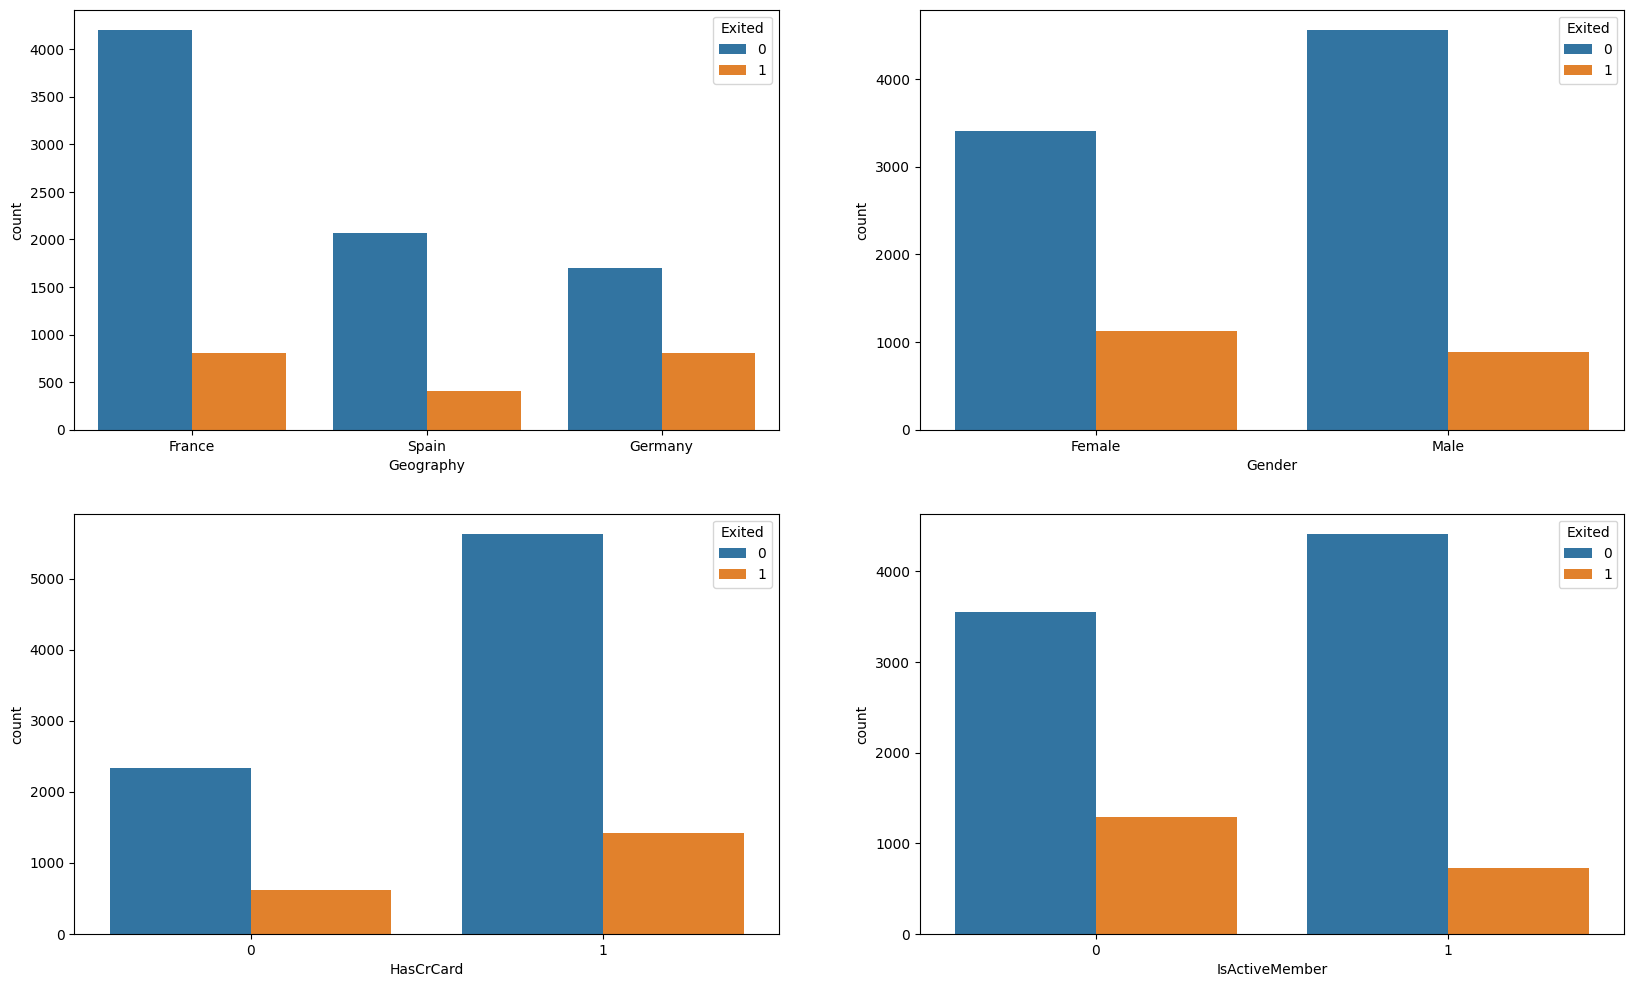

In [29]:
    # Umumi goruntuye nezer yetirek
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

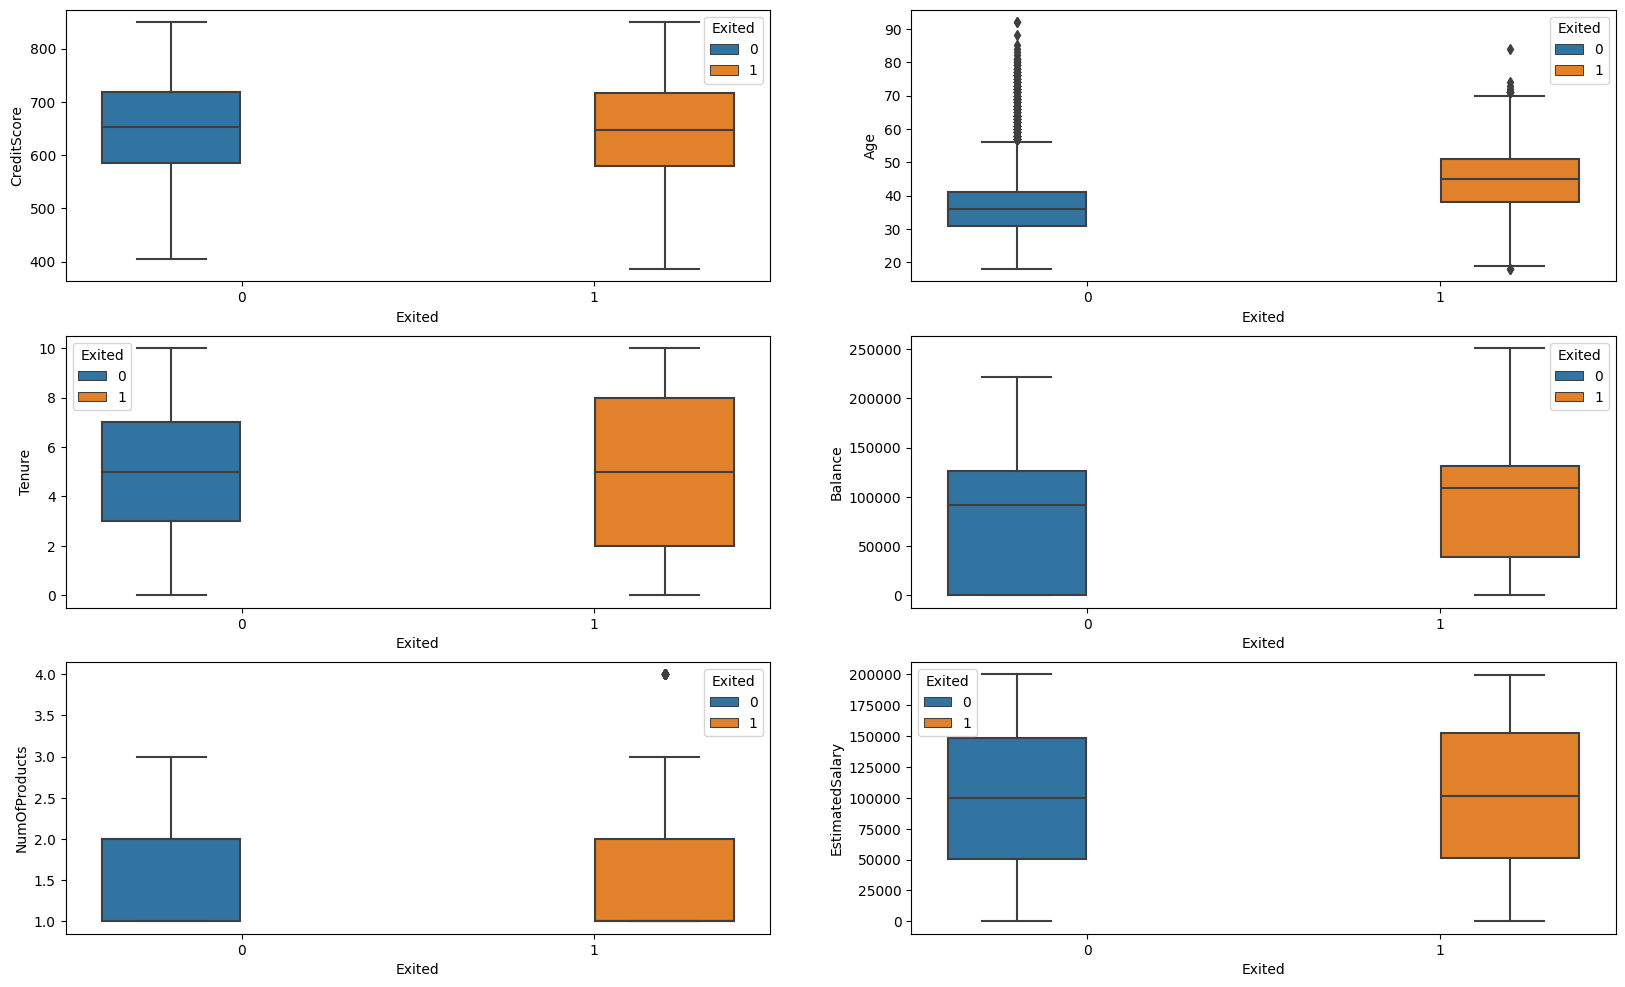

In [30]:
    # Boxplotlara gore umumi goruntuye baxaq
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [31]:
#Gender ve Geograpy columnlarina gore dummy yaradaq
dmy = pd.get_dummies(df.select_dtypes('object') ,  drop_first = True)
dmy.head()
cat_columns = df.select_dtypes('object')
num_cols = df.drop(cat_columns , axis = 1)
df = pd.concat([num_cols , dmy] , axis= 1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,5.0,125510.82,1,1,1,79084.10,0,0,1,0


In [32]:
#Xler ve y mueyyenlesdirilir
y = df["Exited"]
X = df.drop(["Exited"], axis=1)

In [33]:
#Dataseti test ve traine ayiririq
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [34]:
##TRain set uzerinden modeli qururuq
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model


LogisticRegression(solver='liblinear')

In [35]:
#Train predictionslarini cixaririq
predictions_train = loj_model.predict(X_train)
predictions_train

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
##Probabilityleri cixaririq(1-in bas verme ehtimallari)
y_probs = loj_model.predict_proba(X_train)
y_probs = y_probs[:,1]
y_probs

array([0.12375366, 0.11750384, 0.27624792, ..., 0.1317531 , 0.25277495,
       0.14440385])

In [37]:
##train set uzerinden deyerlendirilir
accuracy_score(y_train, predictions_train)

0.7933600457927876

In [38]:
##Test ucun proqnozlari cixaririq
predictions_test = loj_model.predict(X_test)


In [39]:
##Test set uzerinden deyerlendirilir
accuracy_score(y_test, predictions_test)

0.7820427236315087

In [40]:
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
X_test['preds'] = predictions_test

In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,preds
4905,590,30,3.0,0.00,2,1,0,83090.35,0,1,1,0
8666,687,35,1.0,125141.24,2,1,1,148537.07,1,0,1,0
1785,713,40,3.0,114446.84,2,1,1,87308.18,1,0,1,0
9216,724,30,10.0,0.00,2,1,1,54265.55,0,0,1,0
6234,540,37,6.0,0.00,2,1,0,141998.89,0,0,1,0


In [42]:
Churns = X_test[(X_test['preds'] == 1)]
Churns.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,preds
7568,422,54,4.0,0.00,2,1,1,7166.71,0,1,0,1
4743,511,57,8.0,122950.31,1,1,1,181258.76,0,1,0,1
7034,465,53,1.0,117438.17,1,0,0,74898.80,1,0,1,1
734,545,60,7.0,128981.07,1,0,1,176924.21,1,0,0,1
6812,576,63,3.0,148843.56,1,1,0,69414.13,1,0,1,1


In [ ]:
Churns.shape

(92, 12)

In [ ]:
Customer_id[Churns.index]

In [47]:
Churn_customers_id = Customer_id[Churns.index]

In [49]:
Churn_customers_id.to_csv('churns.csv')